# Principal Components Analysis
***

## 1 Dataset: Breast Cancer Wisconsin (Diagnostic)


### 1.1 Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


### 1.2 Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign) 

3-32) Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.


### 1.3 Link 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/

***
## 2 Load libraries and dataset

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### 2.2 Load .csv file

In [2]:
dataset = pd.read_csv('wdbc.csv')
dataset.drop('Unnamed: 32', axis=1, inplace=True)

# Show 5 rows
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = dataset.drop(['id', 'diagnosis'], axis=1).values
y = dataset['diagnosis'].values

In [5]:
pca=PCA(n_components=30)                                    # inicializa classe
pca.fit(X)                                # submete os dados 
PCA(copy=True, n_components=None, whiten=False)
pca.components_                              # componentes principais

array([[  5.08623202e-03,   2.19657026e-03,   3.50763298e-02,
          5.16826469e-01,   4.23694535e-06,   4.05260047e-05,
          8.19399539e-05,   4.77807775e-05,   7.07804332e-06,
         -2.62155251e-06,   3.13742507e-04,  -6.50984008e-05,
          2.23634150e-03,   5.57271669e-02,  -8.05646029e-07,
          5.51918197e-06,   8.87094462e-06,   3.27915009e-06,
         -1.24101836e-06,  -8.54530832e-08,   7.15473257e-03,
          3.06736622e-03,   4.94576447e-02,   8.52063392e-01,
          6.42005481e-06,   1.01275937e-04,   1.68928625e-04,
          7.36658178e-05,   1.78986262e-05,   1.61356159e-06],
       [  9.28705650e-03,  -2.88160658e-03,   6.27480827e-02,
          8.51823720e-01,  -1.48194356e-05,  -2.68862249e-06,
          7.51419574e-05,   4.63501038e-05,  -2.52430431e-05,
         -1.61197148e-05,  -5.38692831e-05,   3.48370414e-04,
          8.19640791e-04,   7.51112451e-03,   1.49438131e-06,
          1.27357957e-05,   2.86921009e-05,   9.36007477e-06,
       

In [6]:
pca.explained_variance_ratio_

array([  9.82044672e-01,   1.61764899e-02,   1.55751075e-03,
         1.20931964e-04,   8.82724536e-05,   6.64883951e-06,
         4.01713682e-06,   8.22017197e-07,   3.44135279e-07,
         1.86018721e-07,   6.99473205e-08,   1.65908880e-08,
         6.99641650e-09,   4.78318306e-09,   2.93549214e-09,
         1.41684927e-09,   8.29577731e-10,   5.20405883e-10,
         4.08463983e-10,   3.63313378e-10,   1.72849737e-10,
         1.27487508e-10,   7.72682973e-11,   6.28357718e-11,
         3.57302295e-11,   2.76396041e-11,   8.14452259e-12,
         6.30211541e-12,   4.43666945e-12,   1.55344680e-12])

In [7]:
pca.explained_variance_

array([  4.43002671e+05,   7.29725279e+03,   7.02596776e+02,
         5.45526944e+01,   3.98199123e+01,   2.99930721e+00,
         1.81213991e+00,   3.70813899e-01,   1.55240237e-01,
         8.39134846e-02,   3.15534015e-02,   7.48418875e-03,
         3.15610001e-03,   2.15770517e-03,   1.32420744e-03,
         6.39144051e-04,   3.74224474e-04,   2.34756323e-04,
         1.84259067e-04,   1.63891523e-04,   7.79729248e-05,
         5.75099161e-05,   3.48559114e-05,   2.83453651e-05,
         1.61179909e-05,   1.24682907e-05,   3.67401338e-06,
         2.84289915e-06,   2.00139207e-06,   7.00763523e-07])

In [8]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance #cumulative sum of variance explained with [n] features

array([  98.2,   99.8,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,
        100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,
        100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,
        100. ,  100. ,  100. ,  100. ,  100. ,  100. ])

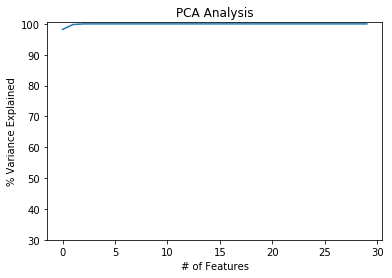

In [10]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(variance)

In [29]:
logistic = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [31]:
number_features = 30

# Prediction
n_components = np.arange(1, number_features, 4)
Cs = np.logspace(-4, 4, 3)

n_components

array([ 1,  5,  9, 13, 17, 21, 25, 29])

In [32]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': array([ 1,  5,  9, 13, 17, 21, 25, 29]), 'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

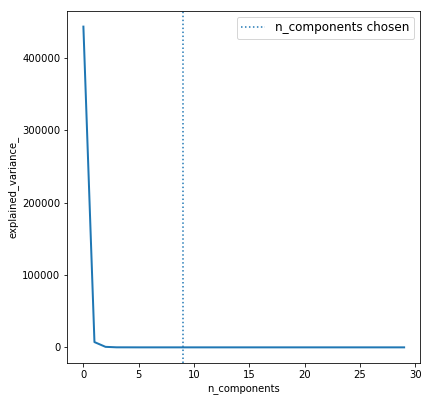

In [34]:
plt.figure(1, figsize=(7, 7))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [35]:
estimator.best_estimator_.named_steps['pca'].n_components

9